In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#%% data
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)
#%% Instructions
'''
Overall instructions:
As described in the homework description, each graphic you make must:
1. Have a thoughtful title
2. Have clearly labelled axes
3. Be legible
4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''
covid_df.head()

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


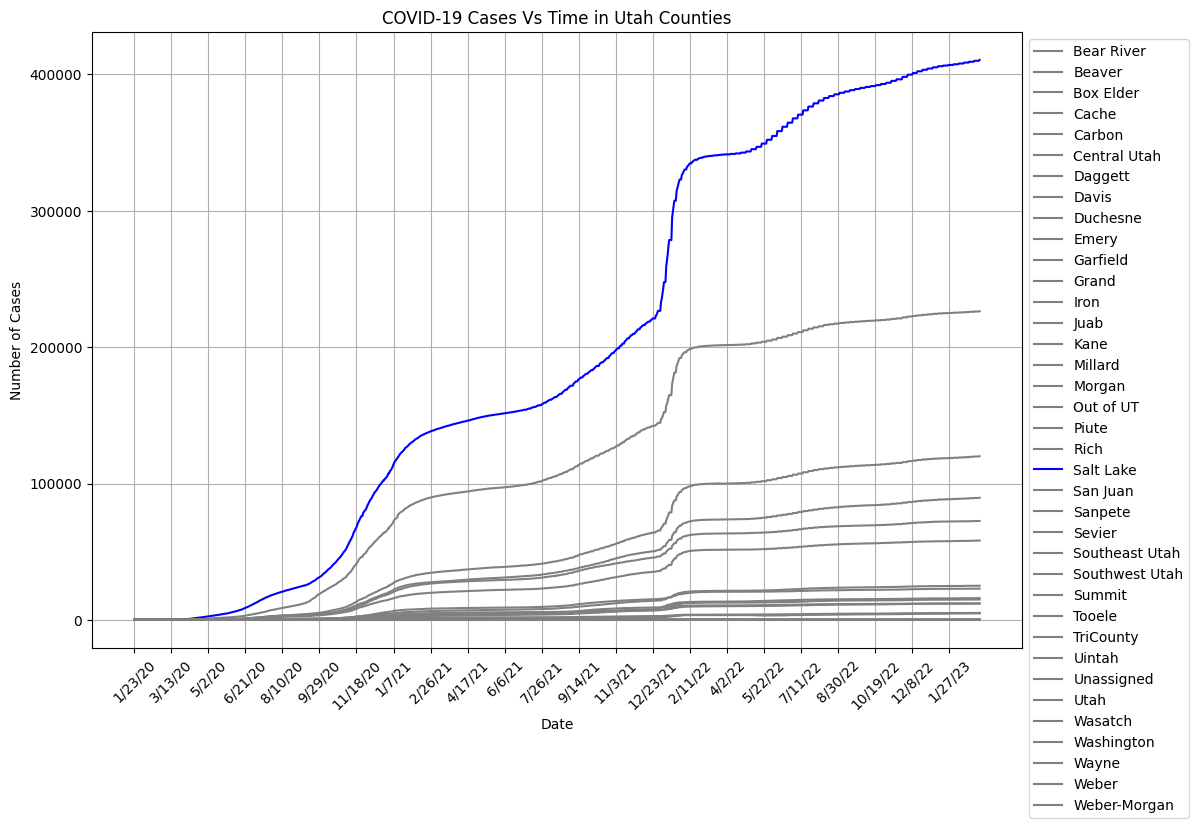

In [137]:
#%% viz 1
'''
VIZ 1
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should
-Show cases over time
-Have all counties plotted in a background color (something like grey)
-Have a single county plotted in a contrasting color (something not grey)
-Have well formatted dates as the X axis
'''
#Utah data
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
#viz1.head()

dates= utah_df.columns[11:]
utah_county = utah_df.groupby(['Admin2']).sum()

#plot figure
plt.figure (figsize=(12,8))

for index in utah_county.index:
    county = utah_county.loc[index, dates]
    color = 'Blue' if index == 'Salt Lake' else 'grey'
    plt.plot(county.index, county.values, label=index, color=color)

#format
plt.xticks(range(0, len(dates), 50), dates[::50], rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Vs Time in Utah Counties')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)

plt.show()


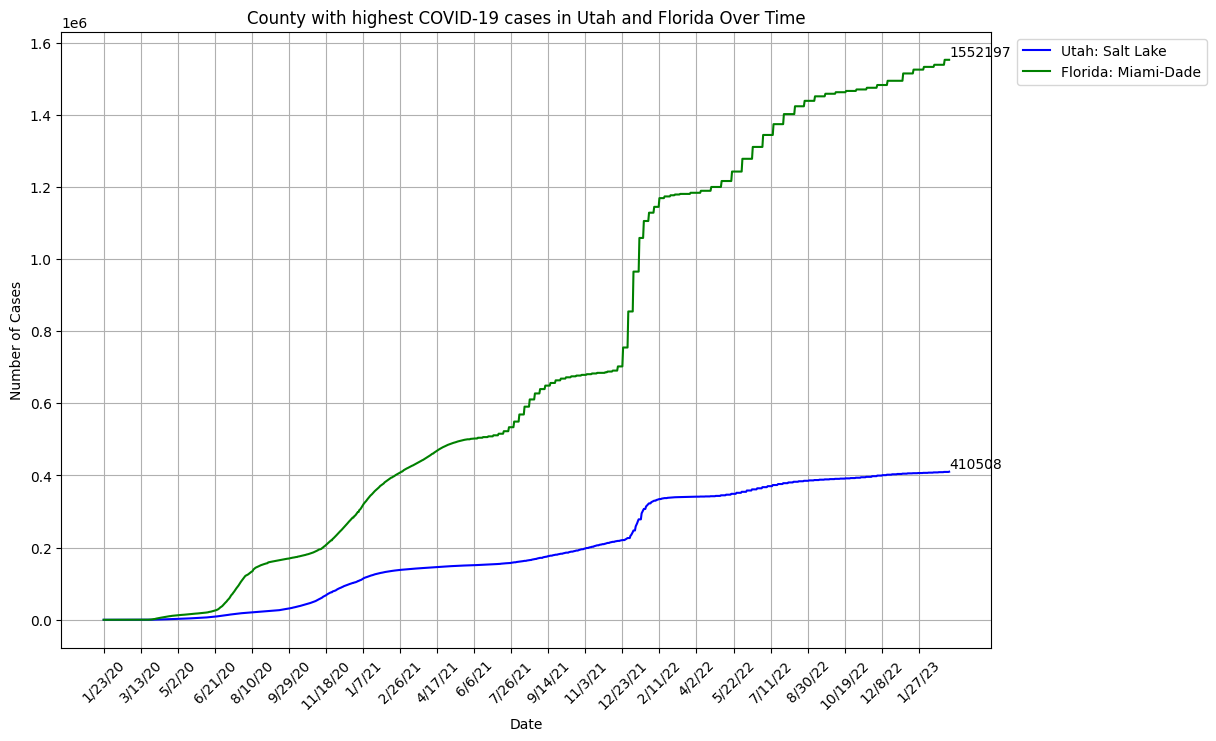

In [107]:
'''
VIZ 2
Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:
-Have only two counties plotted
-Highlight the difference between the two comparison counties
You may use any style of graphic you like as long as it is effective (dense)
and readable
'''
#Get data
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
florida_df = covid_df[covid_df['Province_State'] == 'Florida']

utah_columns = utah_df.columns[11:]
florida_columns = florida_df.columns[11:]

#Find max county
utah_max = utah_df.loc[utah_df[utah_columns].sum(axis=1).idxmax()]
florida_max = florida_df.loc[florida_df[florida_columns].sum(axis=1).idxmax()]

#Get max dates
utah_dates = utah_max[utah_columns].index
florida_dates = florida_max[florida_columns].index

#Get max cases
utah_cases = utah_max[utah_columns].values
florida_cases = florida_max[florida_columns].values

#Plot figure
plt.figure(figsize=(12, 8))

plt.plot(utah_dates, utah_cases, label=f"Utah: {utah_max['Admin2']}", color='Blue')
plt.plot(florida_dates, florida_cases, label=f"Florida: {florida_max['Admin2']}", color='Green')

plt.text(utah_dates[-1], utah_cases[-1], f"{utah_cases[-1]}", ha='left', va='bottom')
plt.text(florida_dates[-1], florida_cases[-1], f"{florida_cases[-1]}", ha='left', va='bottom')

#Format
plt.xticks(range(0, len(utah_columns), 50), utah_columns[::50], rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('County with highest COVID-19 cases in Utah and Florida Over Time')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)

plt.show()

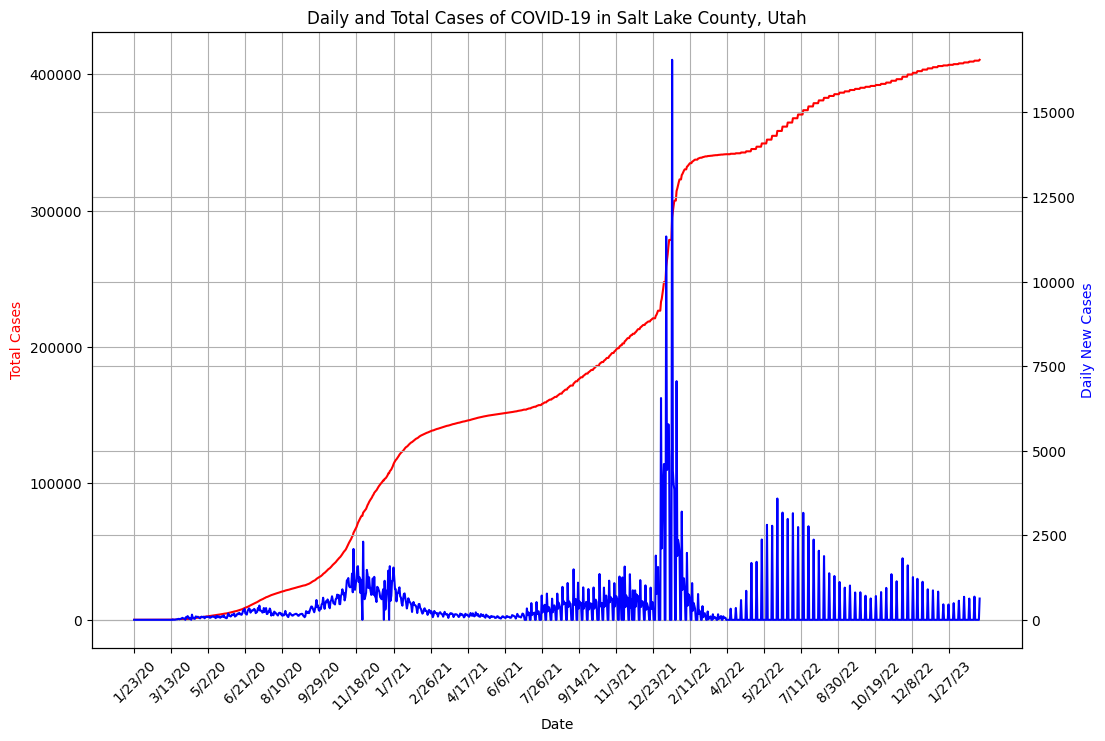

In [135]:
'''
VIZ 3
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:
-Use two y-axes
(https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)
-Use color to contrast the two series being plotted
-Have well formatted dates as the X axis
'''
#Get data
county_df =  covid_df[( covid_df['Province_State'] == 'Utah') & ( covid_df['Admin2'] == 'Salt Lake')]

date_columns =  covid_df.columns[11:]
time = county_df[date_columns].iloc[0]

#New cases
new_cases = time.diff().fillna(0)

#Plot
fig, ax1 = plt.subplots(figsize=(12, 8))

#Plot total cases
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Cases', color='Red')
ax1.plot(time.index, time, color='Red')
plt.grid(True)

#Plot new cases
ax2 = ax1.twinx()
ax2.set_ylabel('Daily New Cases', color='Blue')
ax2.plot(new_cases.index, new_cases, color='Blue')
plt.grid(True)

#Format
ax1.set_xticks(range(0, len(date_columns), 50), utah_columns[::50], rotation=45)
plt.title('Daily and Total Cases of COVID-19 in Salt Lake County, Utah')

plt.show()

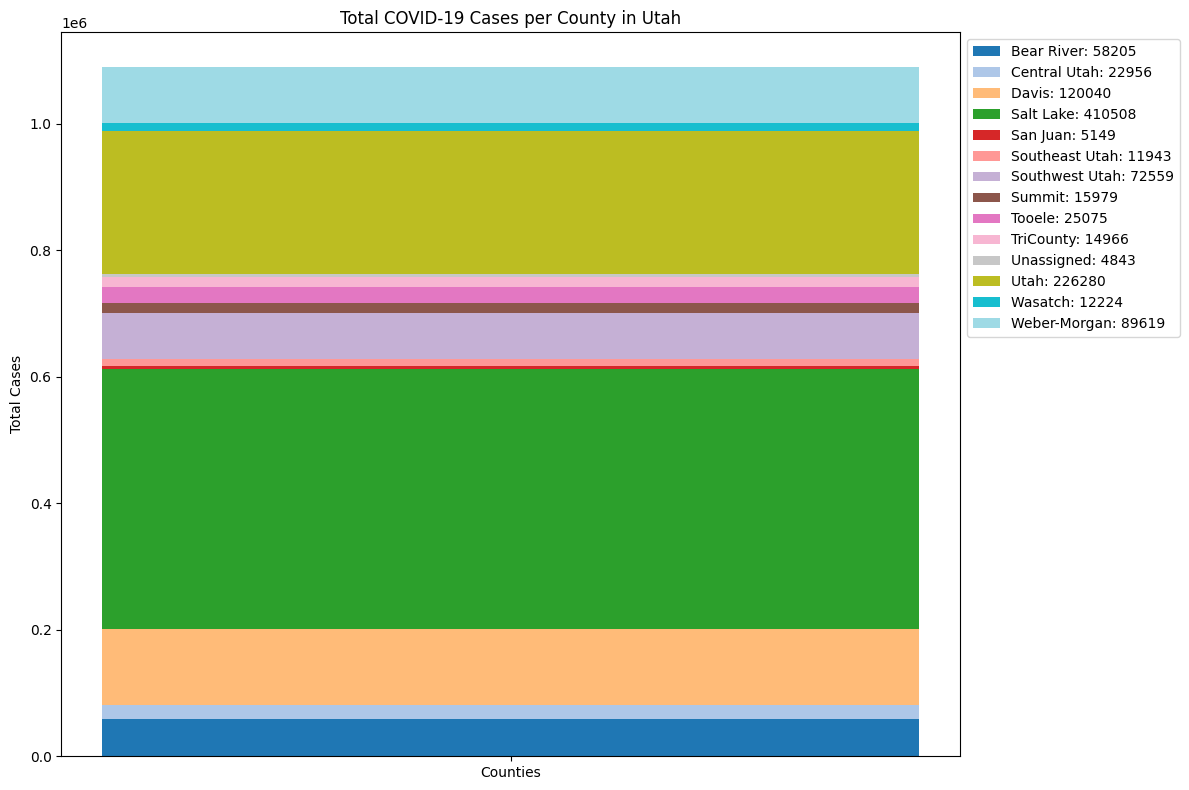

In [190]:
'''
VIZ 4
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).
(https://matplotlib.org/stable/gallery/lines_bars_and_markers/
bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:
-Have a single column delineate a state
-Have each 'slice' or column compontent represent a county
'''
#Get data
utah_df = covid_df[covid_df['Province_State'] == 'Utah']
utah_filtered = utah_df[utah_df.iloc[:, -1] > 0]
county_df = utah_filtered['Admin2']
cases_df = utah_filtered.iloc[:, -1]

plt.figure(figsize=(12, 8))

# Loop through county names and add them as stacked components with unique colors
unique_colors = plt.cm.tab20(np.linspace(0, 1, len(county_df)))
bottom = None
for county, cases, color in zip(county_df, cases_df, unique_colors):
    plt.bar('Counties', cases, bottom=bottom, label=f"{county}: {int(cases)}", color=color)
    if bottom is None:
        bottom = cases
    else:
        bottom += cases

# Plotting
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases per County in Utah')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()
